In [1]:

# Data Manipulation/ Handling
import pandas as pd, numpy as np

# NLP Preprocessing
from gensim.utils import simple_preprocess

# BERT/Transformer
from simpletransformers.classification import ClassificationModel, ClassificationArgs
     

2023-10-04 01:09:57.256822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Importing the dataset
dataset = pd.read_csv('/Users/test/Desktop/news_cato/economic_times_data_2023-2.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})
ds = pd.read_csv('/Users/test/Desktop/news_cato/economic_times_data_2022.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})


dataset.tail(5), ds.head(5)

(                                                headline  \
 26395  Bigg Boss OTT Season 2 Finale: Tune in now for...   
 26396  Kygo at Gunnersbury Park: Date, duration, kick...   
 26397  PM Narendra Modis I-Day Speech lays blueprint ...   
 26398  PM Modi lays foundation for Sant Ravidas templ...   
 26399  Sikkim to get organic agriculture university, ...   
 
                             category  
 26395  OTT, Gaming & Digital Content  
 26396                           FMCG  
 26397                           FMCG  
 26398                           FMCG  
 26399                           FMCG  ,
                                             headline          category
 0  2nd-hand car dealers will be 'deemed' owners o...  Auto & Ancillary
 1  Altigreen Pune Dealership: Altigreen opens new...  Auto & Ancillary
 2  Automotive Aftermarket Suppliers Association: ...  Auto & Ancillary
 3  Automobile dealers: Auto companies force unfai...  Auto & Ancillary
 4  BYD dealership in Delhi: BY

In [3]:
dataset.category.value_counts()

Health & Wellness                5081
Auto & Ancillary                 3438
Communications                   3333
BFSI                             3299
E-Commerce & IT                  2562
FMCG                             2507
Retail                           1497
Handsets                         1212
OTT, Gaming & Digital Content    1084
Fashion & Lifestyle               453
Construction & Real Estate        436
Media & Entertainment             340
Liquor & Tobacco                  256
Consumer Electronics              254
E-health                          230
Internet based service            224
Ed-Tech                           194
Name: category, dtype: int64

In [4]:
ds.category.value_counts()

Health & Wellness                5216
Auto & Ancillary                 4121
BFSI                             4092
Communications                   3127
E-Commerce & IT                  2348
FMCG                             2174
Retail                           1698
OTT, Gaming & Digital Content     818
Handsets                          813
Media & Entertainment             341
Fashion & Lifestyle               331
Consumer Electronics              289
Construction & Real Estate        264
Liquor & Tobacco                  261
Internet based service            227
Ed-Tech                           219
E-health                          211
Name: category, dtype: int64

In [5]:
dataset.isnull().sum()

headline    0
category    0
dtype: int64

In [6]:
# NLP preprocessing
from gensim.utils import simple_preprocess

# NLP Preprocess
def preprocess_text(text):
    try:
        # Check if the text is a valid string, if not, return an empty string
        if isinstance(text, str):
            return ' '.join(simple_preprocess(text))
        else:
            return ''
    except Exception as e:
        print(f"Error processing text: {e}")
        return ''

dataset.iloc[:, 0] = dataset.iloc[:, 0].apply(preprocess_text)
ds.iloc[:, 0] = ds.iloc[:, 0].apply(preprocess_text)

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['category_encoded'] = label_encoder.fit_transform(dataset['category'])
ds['category_encoded'] = label_encoder.transform(ds['category'])

print("Encoded categories:")
print(dataset[['category', 'category_encoded']].drop_duplicates())

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping:")
print(label_mapping)


Encoded categories:
                          category  category_encoded
0                 Liquor & Tobacco                13
1                             BFSI                 1
3                  E-Commerce & IT                 5
6                 Auto & Ancillary                 0
8                             FMCG                 8
19   OTT, Gaming & Digital Content                15
21               Health & Wellness                11
39                  Communications                 2
46          Internet based service                12
49             Fashion & Lifestyle                 9
82                        Handsets                10
89                          Retail                16
90            Consumer Electronics                 4
125     Construction & Real Estate                 3
138                       E-health                 6
141          Media & Entertainment                14
223                        Ed-Tech                 7

Label Mapping:
{'Auto & A

In [8]:

# unique_encoded_labels = dataset['category'].unique()


# print(unique_encoded_labels)


['Liquor & Tobacco' 'BFSI' 'E-Commerce & IT' 'Auto & Ancillary' 'FMCG'
 'OTT, Gaming & Digital Content' 'Health & Wellness' 'Communications'
 'Internet based service' 'Fashion & Lifestyle' 'Handsets' 'Retail'
 'Consumer Electronics' 'Construction & Real Estate' 'E-health'
 'Media & Entertainment' 'Ed-Tech']


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

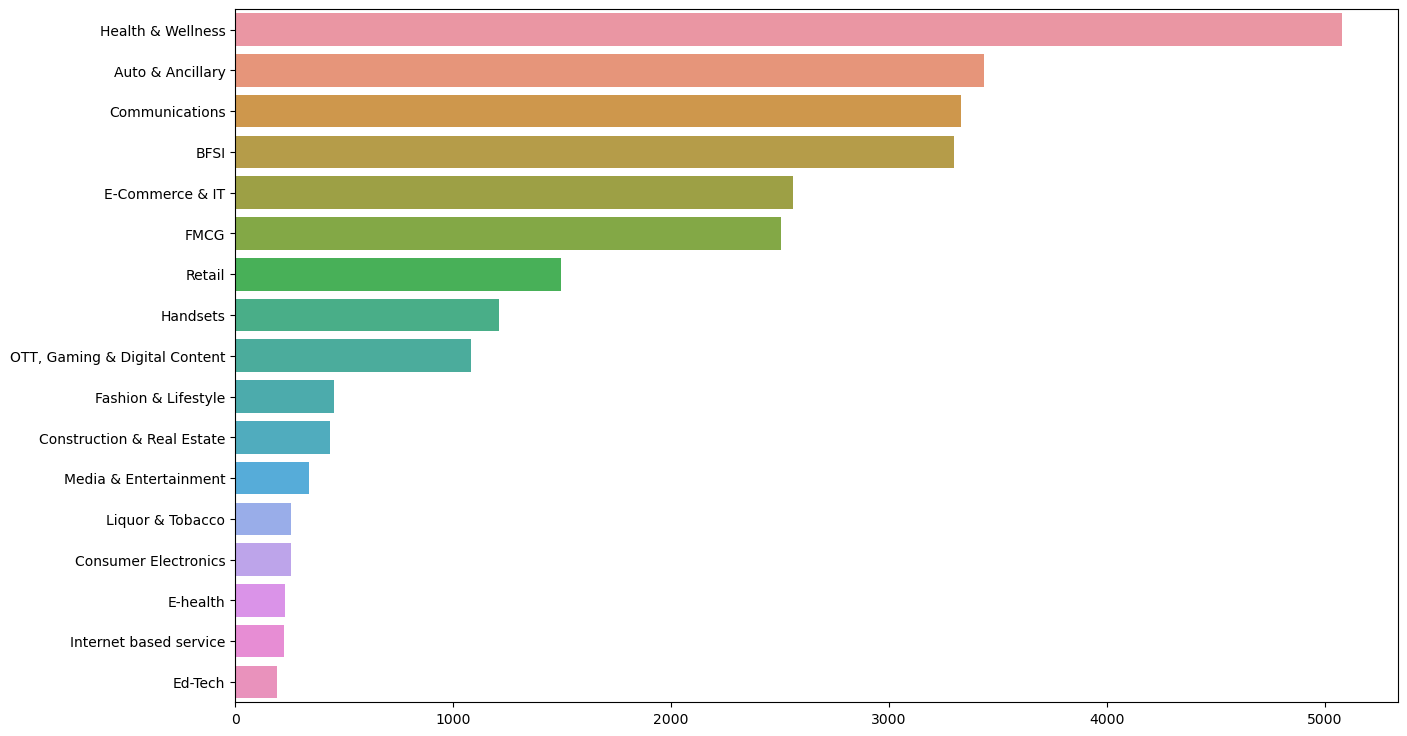

In [10]:
#training set
fig = plt.figure(figsize=(15,9))
sns.barplot(x = dataset['category'].value_counts().values,y=dataset['category'].value_counts().index)

In [13]:

model_args = ClassificationArgs(num_train_epochs = 3, overwrite_output_dir = True)


model = ClassificationModel('bert', 'bert-base-cased', num_labels = 3, args = model_args,
                            use_cuda = True)


model.train_model(dataset)


ValueError: 'use_cuda' set to True when cuda is unavailable. Make sure CUDA is available or set use_cuda=False.